In [1]:
from numqt import *

In [2]:
#-----------------------------------------------------------
# Characteristic lengths of the problem
#-----------------------------------------------------------
Lx = 1 # Characteristic length along x

#-----------------------------------------------------------
# Problem's parameters
#-----------------------------------------------------------
hbar = 1 # reduced Plack constant 
m = 1 # e-mass
wx = hbar / (m * Lx**2) # x confinement frequency

#-----------------------------------------------------------
# Creating operators
#-----------------------------------------------------------
N_states = 500 # Number of states to include
bosonic_ops = bos_ops(dimx = N_states) # Obtaining bosonic operators
a, ad = bosonic_ops["x"] # Extracting bosonic operators
p = bos_p(a, ad, omega = wx, mass = m, hbar = hbar) # momentum operator as fn of a, ad
x = bos_x(a, ad, omega = wx, mass = m, hbar = hbar) # position operator as fn of a, ad

In [3]:
H = p@p / (2*m) + 0.5 * m * wx**2 * x@x
H = Hamiltonian(H)

In [4]:
k = int(N_states/2)
energies, wavefunctions = H.solve(k)

Text(0.5, 0, 'n')

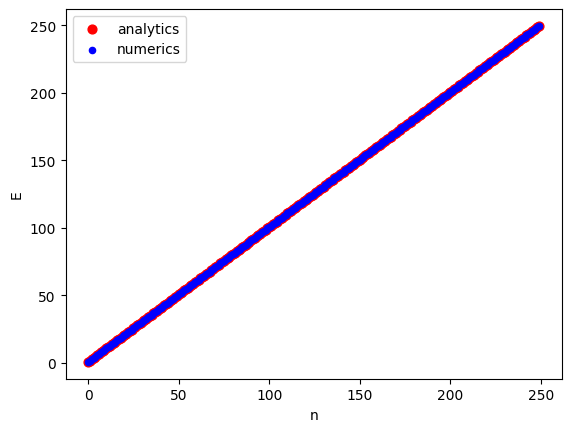

In [5]:
plt.scatter(range(0, k), [hbar * wx *(n + 0.5) for n in range(0, k)], c="r", s = 40, label = "analytics")
plt.scatter(range(0, k), sorted(energies), c="b", s = 20, label = "numerics")
plt.legend()
plt.ylabel("E")
plt.xlabel("n")

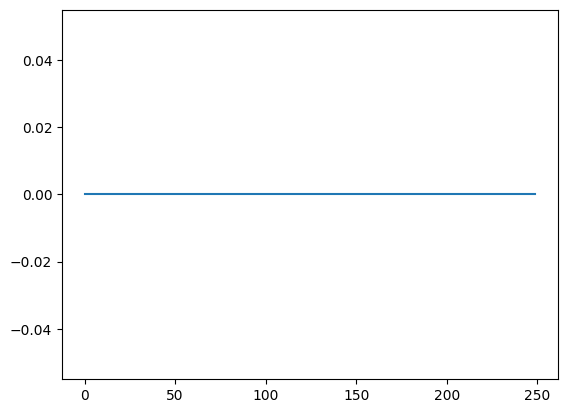

In [6]:
plt.plot(range(k), np.array([hbar * wx *(n + 0.5) for n in range(0, k)])- np.array(sorted(energies)).round(4))